# ES 335 Prerequsite Test

In [1]:
# install libraries
!python.exe -m pip install --upgrade pip
!pip install pandas jax

In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import jax
import jax.numpy as jnp
import time

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let us say we have matrices $A_{n \times k}$ and $B_{k \times m}$. The prodct $AB$ has $n \times m$ entries. The entry $AB_{i, j}$ is the scalar product of the $i$-th row of $A$ with the $j$-th column of $B$.

These vectors have $k$ entries each. To compute the scalar product of two vectors of length $k$, we need $k$ multiplications and $k-1$ additions.

In total, we have $n \times m \times k$ multiplications and $n \times m \times (k-1)$ additions for computing the matrix product $AB$.

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [3]:
n = 400
m = 300
k = 500

A = np.random.randint(100, size=(n, k))
B = np.random.randint(100, size=(k, m))

L1 = A.tolist()
L2 = B.tolist()
L = [[0 for i in range(m)] for j in range(n)]

list_start_time = time.time()
for i in range(n):
    for j in range(m):
        for k_ in range(k):
            L[i][j] += L1[i][k_] * L2[k_][j] # trivial matrix multiplication
list_end_time = time.time()

np_start_time = time.time()
C = A @ B # matrix product in numpy
np_end_time = time.time()

list_time = list_end_time - list_start_time
np_time = np_end_time - np_start_time

print(f'Multiplying lists took {list_time} seconds.')
print(f'Multiplying numpy arrays took {np_time} seconds.')
print(f'Using numpy gives a {list_time / np_time}x speed up.')
print('Computed list product:')
print(np.array(L)) # for pretty printing
print('Computed numpy arrays product:')
print(C)

Multiplying lists took 6.295080900192261 seconds.
Multiplying numpy arrays took 0.06821465492248535 seconds.
Using numpy gives a 92.28340900273668x speed up.
Computed list product:
[[1226313 1235411 1212340 ... 1229543 1249241 1197462]
 [1176294 1156442 1135773 ... 1202855 1194643 1114154]
 [1284389 1213216 1246004 ... 1273754 1315742 1198162]
 ...
 [1215262 1131439 1149425 ... 1192831 1214497 1169218]
 [1182000 1164814 1126832 ... 1160636 1202661 1175030]
 [1233012 1191444 1203454 ... 1242997 1233676 1176387]]
Computed numpy arrays product:
[[1226313 1235411 1212340 ... 1229543 1249241 1197462]
 [1176294 1156442 1135773 ... 1202855 1194643 1114154]
 [1284389 1213216 1246004 ... 1273754 1315742 1198162]
 ...
 [1215262 1131439 1149425 ... 1192831 1214497 1169218]
 [1182000 1164814 1126832 ... 1160636 1202661 1175030]
 [1233012 1191444 1203454 ... 1242997 1233676 1176387]]


As we can see, there is nearly a 90x speedup (for the above dimensions) by using numpy arrays instead of vanilla python lists. It is also more convenient to perform linear algebra operations like matrix multiplication with the help of numpy. This massive speed boost is due to many low level optimizations inside of numpy. Numpy uses optimized C/Fortran libraries, vectorized operations, efficient memory layout, and hardware utilization, reducing overhead, thereby improving performance.

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

In [23]:
n = 15000
l1 = np.random.rand(n)
l2 = l1.copy()
l3 = l1.copy()
print(f'The array is {l1}')

# O(n^2) trivial method
t1 = time.time()
for i in range((n + 1) // 2 + 1):
    for j in range(i + 1, n):
        if l1[j] < l1[i]:
            l1[i], l1[j] = l1[j], l1[i]
med = l1[(n + 1) // 2] if n % 2 == 1 else (l1[n // 2 - 1] + l1[n // 2]) / 2
t2 = time.time()
print(f'{med} is the median. Time taken: {t2 - t1} seconds.')

# sorting in O(nlogn)
t3 = time.time()
l2.sort()
med = l2[(n + 1) // 2] if n % 2 == 1 else (l2[n // 2 - 1] + l2[n // 2]) / 2
t4 = time.time()
print(f'{med} is the median. Time taken: {t4 - t3} seconds.')

# numpy median (optimized)
t5 = time.time()
med = np.median(l3)
t6 = time.time()
print(f'{med} is the median. Time taken: {t6 - t5} seconds.')

The array is [0.03981899 0.89638916 0.11997944 ... 0.65633808 0.73091175 0.96623604]
0.4959562679814684 is the median. Time taken: 16.639182806015015 seconds.
0.4959562679814684 is the median. Time taken: 0.0013184547424316406 seconds.
0.4959562679814684 is the median. Time taken: 0.0 seconds.


The first method of passing through the array every time to find the first max, second max and so on takes $O(n^2)$ time since we have to pass through $O(n)$ elements in $O(n)$ iterations. A better approach is to optimize this by sorting the array beforehand with any worst-case $O(n\log{n})$ sorting algorithm like mergesort. As visible from above, the sorting approach is obviously better than the naive approach, while `np.median` outperforms all of them.

## 4. What is the gradient of the following function with respect to x and y?
## $$x^2y + y^3\sin{x}$$

Let $$f(x, y) = x^2y + y^3\sin{x}$$ We have 

$$\dfrac{\partial f}{\partial x} = \dfrac{\partial}{\partial x} \left( x^2 y + y^3 \sin{x} \right) = 2xy + y^3 \cos{x}$$

and 

$$\dfrac{\partial f}{\partial y} = \dfrac{\partial}{\partial y} \left( x^2 y + y^3 \sin{x} \right) = x^2 + 3y^2 \sin{x}$$

## 5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [5]:
def anal_grad_x(x, y): # analytic expression for gradient wrt x
    return 2 * x * y + y ** 3 * np.cos(x)

def anal_grad_y(x, y): # same but y
    return x ** 2 + 3 * y ** 2 * np.sin(x)

def f(x, y): # the actual function for gradient evaluation
    return x ** 2 * y + y ** 3 * jnp.sin(x)

for i in range(5):
    x, y = np.random.rand(), np.random.rand()
    f_x = anal_grad_x(x, y)
    f_y = anal_grad_y(x, y)
    grad_x, grad_y = jax.grad(f, argnums=(0, 1))(x, y)

    print(f'x and y: {x:.4f} {y:.4f}')
    print(f'Analytic gradients wrt x and y: {f_x:.4f} {f_y:.4f}')
    print(f'JAX computed gradients wrt x and y: {grad_x:.4f} {grad_y:.4f}\n')

x and y: 0.6131 0.2195
Analytic gradients wrt x and y: 0.2778 0.4590
JAX computed gradients wrt x and y: 0.2778 0.4590

x and y: 0.2956 0.2285
Analytic gradients wrt x and y: 0.1465 0.1330
JAX computed gradients wrt x and y: 0.1465 0.1330

x and y: 0.4314 0.5864
Analytic gradients wrt x and y: 0.6892 0.6175
JAX computed gradients wrt x and y: 0.6892 0.6175

x and y: 0.1880 0.1889
Analytic gradients wrt x and y: 0.0777 0.0554
JAX computed gradients wrt x and y: 0.0777 0.0554

x and y: 0.0954 0.9632
Analytic gradients wrt x and y: 1.0735 0.2743
JAX computed gradients wrt x and y: 1.0735 0.2743



## 6. Use `sympy` to confirm that you obtain the same gradient analytically.

In [6]:
x, y = symbols('x y')
expr = x * x * y + y * y * y * sin(x)
del_x, del_y = Derivative(expr, x), Derivative(expr, y)
del_x.doit() # derivative wrt x

2*x*y + y**3*cos(x)

In [7]:
del_y.doit() # derivative wrt y

x**2 + 3*y**2*sin(x)

## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [8]:
# sample data
years = [i for i in range(2022, 2026)]
branches = ['AI', 'CSE', 'EE']
roll_numbers = [i for i in range(1, 3)]
names = ['Alice', 'Bob', 'Cook']
subjects = ['Math', 'English', 'Science']
dictionary = {}

for year in years:
    dictionary[year] = {}
    for branch in branches:
        dictionary[year][branch] = {}
        for roll, name in zip(roll_numbers, names):
            dictionary[year][branch][(roll, name)] = {}
            for subject in subjects:
                dictionary[year][branch][(roll, name)][subject] = np.random.randint(50, 100)

print(dictionary)
# pretty print
for year in years:
    print(f'Year: {year}')
    for branch in branches:
        print(f'{" " * 4}Branch: {branch}')
        for roll, name in zip(roll_numbers, names):
            print(f'{" " * 8}Roll Number: {roll}, Name: {name}, Marks:')
            for subject in subjects:
                print(f'{" " * 12}{subject} {dictionary[year][branch][(roll, name)][subject]}')


{2022: {'AI': {(1, 'Alice'): {'Math': 73, 'English': 71, 'Science': 94}, (2, 'Bob'): {'Math': 71, 'English': 65, 'Science': 77}}, 'CSE': {(1, 'Alice'): {'Math': 67, 'English': 99, 'Science': 76}, (2, 'Bob'): {'Math': 89, 'English': 50, 'Science': 70}}, 'EE': {(1, 'Alice'): {'Math': 92, 'English': 90, 'Science': 50}, (2, 'Bob'): {'Math': 87, 'English': 58, 'Science': 72}}}, 2023: {'AI': {(1, 'Alice'): {'Math': 89, 'English': 61, 'Science': 67}, (2, 'Bob'): {'Math': 65, 'English': 98, 'Science': 96}}, 'CSE': {(1, 'Alice'): {'Math': 81, 'English': 82, 'Science': 75}, (2, 'Bob'): {'Math': 60, 'English': 74, 'Science': 83}}, 'EE': {(1, 'Alice'): {'Math': 50, 'English': 83, 'Science': 76}, (2, 'Bob'): {'Math': 86, 'English': 99, 'Science': 74}}}, 2024: {'AI': {(1, 'Alice'): {'Math': 99, 'English': 62, 'Science': 65}, (2, 'Bob'): {'Math': 81, 'English': 52, 'Science': 93}}, 'CSE': {(1, 'Alice'): {'Math': 78, 'English': 52, 'Science': 94}, (2, 'Bob'): {'Math': 96, 'English': 80, 'Science': 81}

## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [9]:
class Student:
    def __init__(self, name, roll):
        self.name = name
        self.roll = roll
        self.marks = {}

    def add_mark(self, subject, mark):
        self.marks[subject] = mark

    def __repr__(self):
        return f"Student(roll={self.roll}, name={self.name}, marks={self.marks})"

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        students_repr = '\n'.join(f"{' '*8}{student}" for student in self.students)
        return f"Branch(name={self.branch_name}):\n{students_repr}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        branches_repr = '\n'.join(f"{' '*4}{branch}" for branch in self.branches)
        return f"Year(year={self.year}):\n{branches_repr}"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        years_repr = '\n'.join(f"{year}" for year in self.years)
        return f"{years_repr}"

# sample data
db = Database()
years = [2022, 2023, 2024, 2025]
branches = ['AI', 'CSE', 'EE']
names = ['Alice', 'Bob', 'Cook']
subjects = ['Math', 'English', 'Science']

for year_num in years:
    year = Year(year_num)
    db.add_year(year)
    for branch_name in branches:
        branch = Branch(branch_name)
        year.add_branch(branch)
        for i, name in enumerate(names, 1):
            student = Student(name, i)
            branch.add_student(student)
            for subject in subjects:
                student.add_mark(subject, np.random.randint(50, 100))

print(db)

Year(year=2022):
    Branch(name=AI):
        Student(roll=1, name=Alice, marks={'Math': 91, 'English': 83, 'Science': 57})
        Student(roll=2, name=Bob, marks={'Math': 65, 'English': 64, 'Science': 62})
        Student(roll=3, name=Cook, marks={'Math': 72, 'English': 97, 'Science': 72})
    Branch(name=CSE):
        Student(roll=1, name=Alice, marks={'Math': 67, 'English': 79, 'Science': 52})
        Student(roll=2, name=Bob, marks={'Math': 93, 'English': 52, 'Science': 77})
        Student(roll=3, name=Cook, marks={'Math': 83, 'English': 91, 'Science': 98})
    Branch(name=EE):
        Student(roll=1, name=Alice, marks={'Math': 97, 'English': 84, 'Science': 53})
        Student(roll=2, name=Bob, marks={'Math': 71, 'English': 86, 'Science': 77})
        Student(roll=3, name=Cook, marks={'Math': 94, 'English': 69, 'Science': 77})
Year(year=2023):
    Branch(name=AI):
        Student(roll=1, name=Alice, marks={'Math': 99, 'English': 62, 'Science': 65})
        Student(roll=2, name=B

## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [10]:
x = np.arange(0.5, 100.5, 0.5)

def plot(y, title_str):
    plt.plot(x, y)
    plt.title(title_str)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.show()

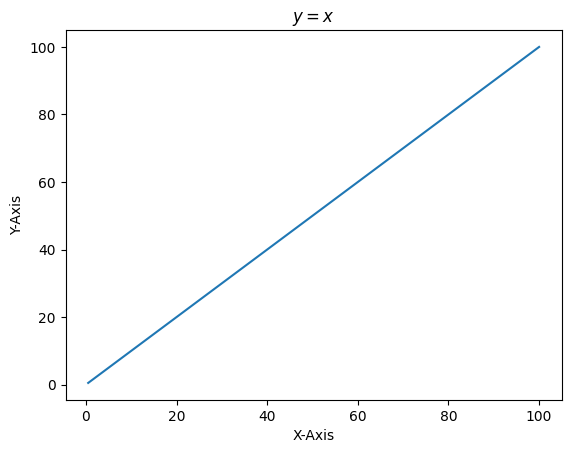

In [11]:
plot(x, '$y = x$')

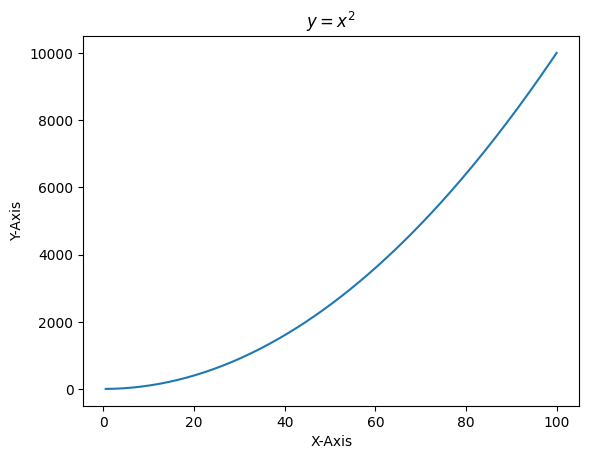

In [12]:
plot(x ** 2, '$y = x^2$')

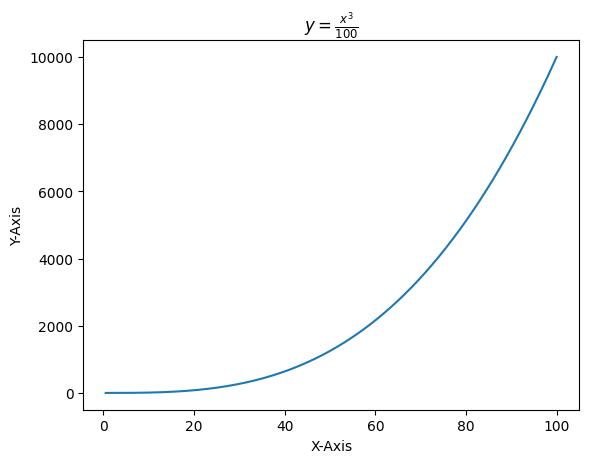

In [13]:
plot((x ** 3) / 100, '$y = \\frac{x^3}{100}$')

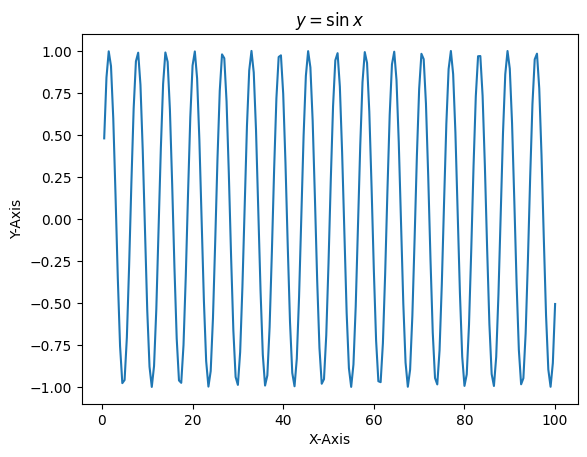

In [14]:
plot(np.sin(x), '$y = \\sin{x}$')

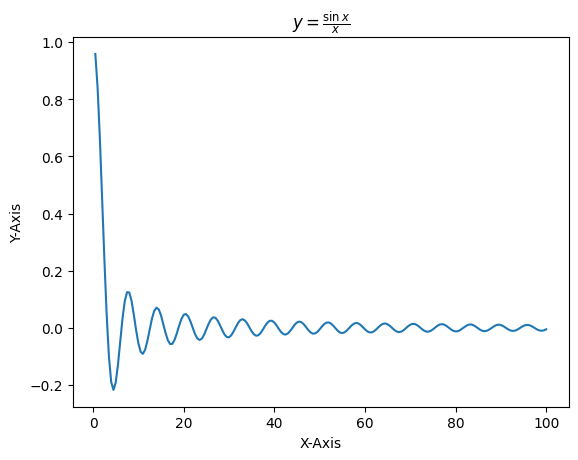

In [15]:
plot(np.sin(x) / x, '$y = \\frac{\\sin{x}}{x}$')

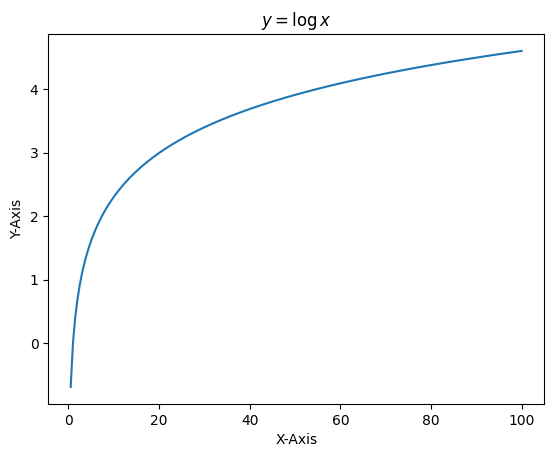

In [16]:
plot(np.log(x), '$y = \\log{x}$')

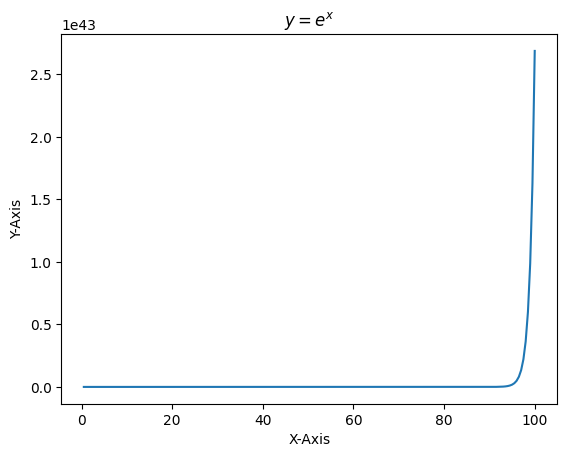

In [17]:
plot(np.exp(x), '$y = e^x$')

## 10. Using numpy generate a matrix of size `20x5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [18]:
X = 1 + np.random.rand(20, 5)
df = pd.DataFrame(X)
df.columns = [chr(i) for i in range(ord('a'), ord('f'))]
print(df)
print(df.std())
print(f'Column {chr(ord('a') + np.argmax(df.std().tolist()))} has the highest standard deviation.')
print(df.mean(axis=1))
print(f'Row {np.argmin(df.mean(axis=1)).tolist()} has the least mean.')

           a         b         c         d         e
0   1.591085  1.089029  1.814841  1.600856  1.339001
1   1.192733  1.588968  1.670202  1.842526  1.249420
2   1.438696  1.384076  1.650796  1.482490  1.901023
3   1.791584  1.652064  1.719810  1.002436  1.367790
4   1.102262  1.815290  1.782915  1.418793  1.372814
5   1.241705  1.566898  1.985709  1.660916  1.480839
6   1.869370  1.065187  1.952129  1.917251  1.027831
7   1.646693  1.354701  1.458385  1.029017  1.626996
8   1.066868  1.861596  1.376162  1.404115  1.910663
9   1.935863  1.870042  1.859082  1.969210  1.573017
10  1.032371  1.527622  1.118931  1.419528  1.793172
11  1.176793  1.208384  1.955024  1.884350  1.036662
12  1.899063  1.817389  1.929292  1.861733  1.090220
13  1.104511  1.134883  1.102723  1.077535  1.900723
14  1.399637  1.312511  1.008210  1.345241  1.153621
15  1.628870  1.603293  1.014694  1.392474  1.561085
16  1.826265  1.192710  1.458503  1.342314  1.742556
17  1.046299  1.242079  1.868292  1.131362  1.

## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [19]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df = df.groupby('g')
df['f'].std()

g
GT8    0.430994
LT8    0.589091
Name: f, dtype: float64

## 12. Write a small piece of code to explain broadcasting in numpy.

In [20]:
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
b = np.array([1, 2, 3, 4])
print(a + b)

[[ 2  4  6  8]
 [ 6  8 10 12]
 [10 12 14 16]]


Although this matrix and vector are not mathematically compatible for addition, numpy automatically broadcasts the vector to match the shape of the matrix. As a consequence, the addition is performed row-wise and we get a meaningful result. This is what broadcasting does.

## 13. Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [21]:
arr = np.random.rand(4, 5, 2, 3, 2)
print(arr)

min_value = np.inf
pos = None

def argmin(a, shp, cur_pos):
    global min_value, pos
    if len(shp) == 0:
        if a < min_value:
            min_value = a
            pos = cur_pos
    else:
        l = shp[0]
        new_shp = shp[1:]
        for i in range(l):
            new_pos = cur_pos + (i,)
            argmin(a[i], new_shp, new_pos)

argmin(arr, arr.shape, ())

print(f'Naive argmin: {pos}')
print(f'Numpy argmin: {np.unravel_index(np.argmin(arr), arr.shape)}')

[[[[[0.41425082 0.48676989]
    [0.64106571 0.21489545]
    [0.21646012 0.49074375]]

   [[0.45586397 0.21911739]
    [0.61707109 0.40315555]
    [0.33044082 0.07955896]]]


  [[[0.9846556  0.15489074]
    [0.50666582 0.60526532]
    [0.13659513 0.19140476]]

   [[0.54616581 0.80410406]
    [0.0847982  0.44519152]
    [0.28864425 0.71434419]]]


  [[[0.11289136 0.03406164]
    [0.18609798 0.26294856]
    [0.1912995  0.98419346]]

   [[0.60236567 0.31906219]
    [0.81207786 0.82480439]
    [0.44901612 0.46992186]]]


  [[[0.36576383 0.20481238]
    [0.38729281 0.71949986]
    [0.53696767 0.32954207]]

   [[0.3421044  0.99679732]
    [0.64066254 0.19731039]
    [0.44676657 0.38483135]]]


  [[[0.86355859 0.08577326]
    [0.46296713 0.73080038]
    [0.15163292 0.52372563]]

   [[0.7119436  0.22996426]
    [0.45008763 0.06007084]
    [0.46760991 0.42386346]]]]



 [[[[0.84626056 0.90629424]
    [0.69635015 0.51122273]
    [0.03909348 0.08104577]]

   [[0.54787806 0.68456467]
    [0.7082575